# Eigenfaces

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import time

In [3]:
olive = datasets.fetch_olivetti_faces()
olive.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
olive.images.shape

(400, 64, 64)

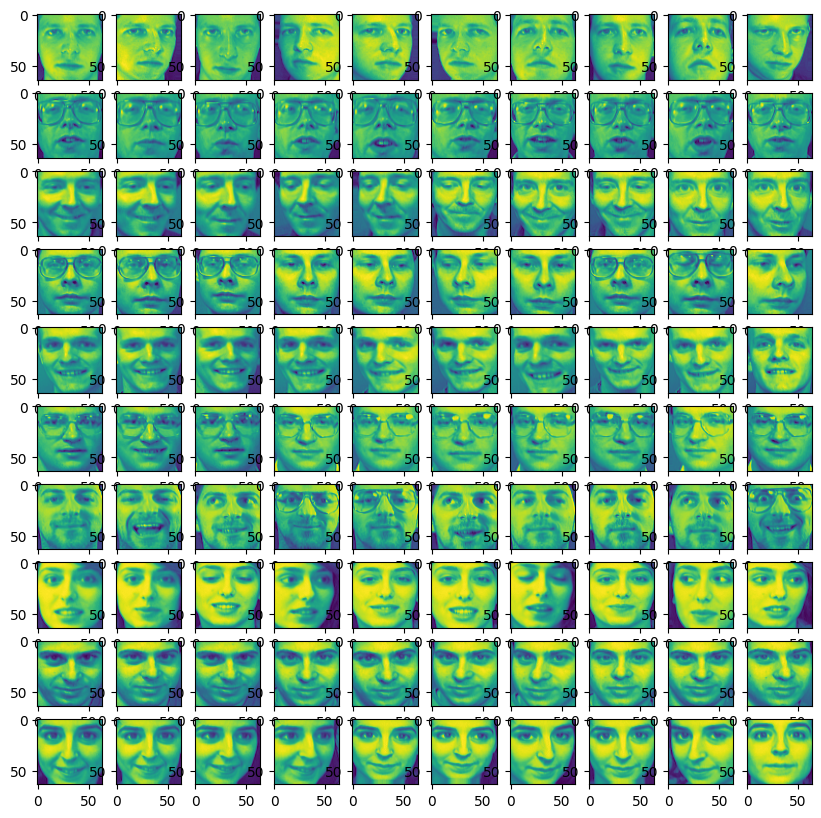

5.1285600662231445


In [5]:
fig = plt.figure(figsize = (10, 10))
start = time.time()
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.imshow(olive.images[i])
plt.show()
end = time.time()
print(end - start)

In [6]:
x = olive.data
y = olive.target
x.shape

(400, 4096)

In [7]:
pca = PCA()
pca.fit(x)

PCA()

In [8]:
pca.components_.shape

(400, 4096)

### Now, we will decide the value of 'k' on the basis of amount of variance we want to retain

In [9]:
sum(pca.explained_variance_)

79.11808389958877

In [10]:
k = 0
total = sum(pca.explained_variance_)
current_sum = 0
while current_sum/total < 0.95:
    current_sum += pca.explained_variance_[k]
    k+=1
k

123

### Thus, we need only 123 components out of 4096, and we can retain variance of 95%

## Now, we will reproduce the images with 123 components only

In [11]:
pca = PCA(n_components=k, whiten=True)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [12]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [13]:
x_approx_image = x_approx.reshape((400, 64, 64))

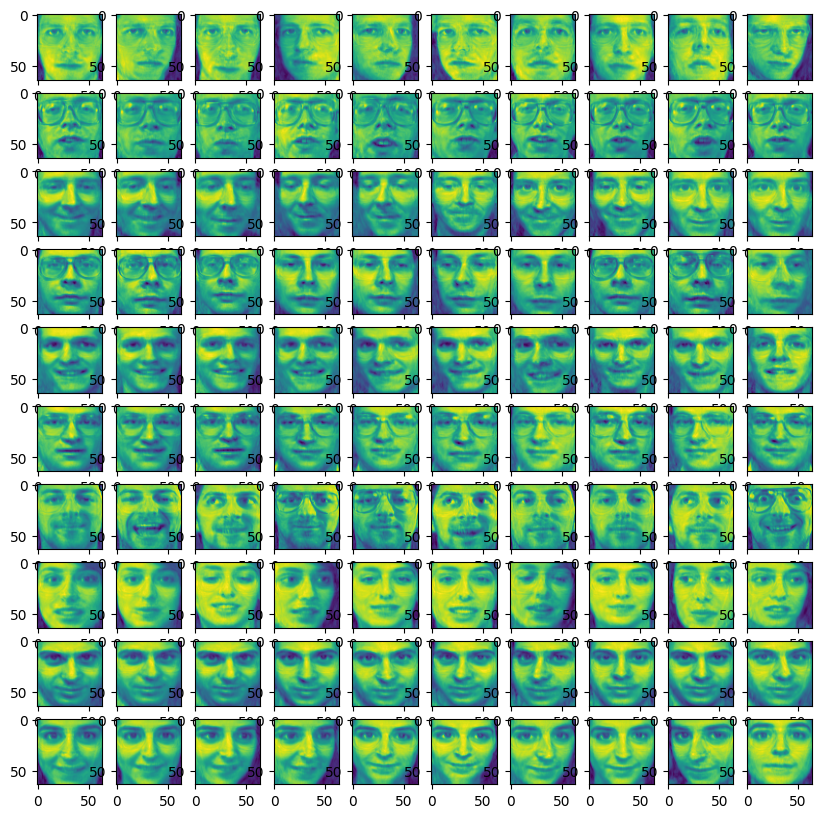

5.228964805603027


In [14]:
start = time.time()
fig = plt.figure(figsize = (10, 10))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.imshow(x_approx_image[i])
plt.show()
end = time.time()
print(end - start)

In [15]:
eigenv = pca.components_
eigenv.shape

(123, 4096)

In [16]:
eigenfaces = eigenv.reshape((123, 64, 64)) #Reshaping like an image

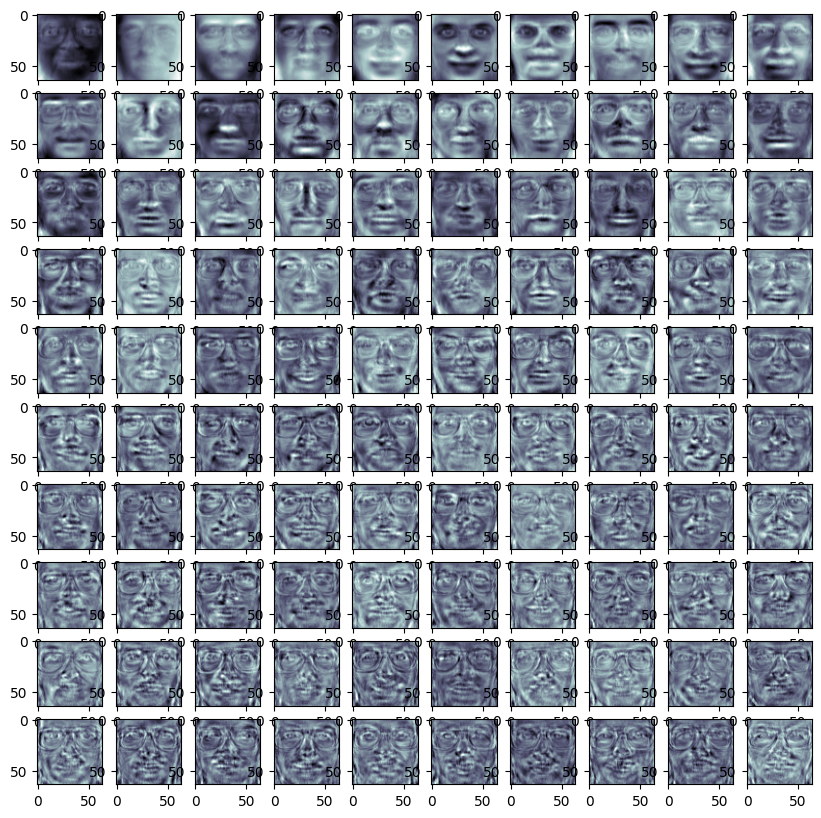

In [17]:
fig = plt.figure(figsize = (10, 10))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.imshow(eigenfaces[i], cmap = plt.cm.bone)
plt.show()

### This data is not random, these components have some meaning attached to them each components is focusing on particular feature of the face